<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python_%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_004_%EA%B8%B0%ED%98%B8_%EC%97%B0%EC%82%B0(SymPy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

SymPy 예제

간단한 선형 미분 방정식은 직접 적분을 통하여 해석적인 해를 구할 수 있다. 이번 강의에서는 SymPy 패키지를 활용하여 간단한 미분 방정식의 해석적 해를 구하는 방법을 소개한다.

간단한 예로, 포물선 운동, 즉 수평한 지표면에 대하여 대하여 각도 $\theta_0$로 비스듬히 위로, 그리 빠르지 않은 속력 $v_0$로 던져 올린 물체의 운동을 다뤄 본다.

In [ ]:
import sympy as sym         #symbolic
import numpy as np
import matplotlib.pyplot as plt

독립 변수 $t$와 몇 가지 상수들을 위한 기호를 먼저 정의한다:

In [ ]:
t = sym.Symbol('t')
v0, th0, g = sym.symbols(r'v_0, \theta_0 g') # raw string

In [ ]:
t

t

In [ ]:
sym.init_printing()

In [ ]:
v0, th0, g

(v₀, \theta₀, g)

$x$, $y$ 방향 가속도 성분:

In [ ]:
ax = 0
ay = -g

In [ ]:
ax, ay

(0, -g)

$x$, $y$ 방향 속도 성분은 각각 가속도를 적분하여 구한다:

In [ ]:
vx = sym.integrate(ax, (t, 0, t)) + v0 * sym.cos(th0)
vy = sym.integrate(ay, (t, 0, t)) + v0 * sym.sin(th0)

In [ ]:
vx, vy

(v₀⋅cos(\theta₀), -g⋅t + v₀⋅sin(\theta₀))

가장 높이 올라간 지점에서 $y$ 방향 속도는 순간적으로 $0$이 되므로, 이 때의 시각 $t_H$를 구하면

$$v_y (t_H) = 0,$$

즉

$$ -gt_H + v_0 \sin\theta_0 = 0$$

을 풀어서

$$ t_H = \frac{v_0\sin\theta_0}{g}$$

를 구할 수 있다. 이 풀이 과정을 sympy로 수행하면 다음과 같다:

In [ ]:
tH = sym.solve(vy, t)
tH

⎡v₀⋅sin(\theta₀)⎤
⎢───────────────⎥
⎣       g       ⎦

In [ ]:
tH[0]

v₀⋅sin(\theta₀)
───────────────
       g       

위치는 다시 속도를 시간에 대해 적분하여 구한다. 단 처음 위치는 간단한 경우를 택하여 $(x_0, y_0) = (0, 0)$으로 둔다.

In [ ]:
x = sym.integrate(vx, (t, 0, t))
y = sym.integrate(vy, (t, 0, t))

In [ ]:
x, y

⎛                        2                    ⎞
⎜                     g⋅t                     ⎟
⎜t⋅v₀⋅cos(\theta₀), - ──── + t⋅v₀⋅sin(\theta₀)⎟
⎝                      2                      ⎠

구체적인 사례에 대한 계산을 하기 위해 상수 값을 따로 정의한다

In [ ]:
V0 = 20
TH0 = np.pi/4
G = 9.8

# 상수 기호를 값으로 치환하기 위한 규칙:
# 기호 변수와 상수 값을 담고 있는 변수를 구별하기 위해 별도의 기호를 사용한다.
rules = {v0: V0, th0: TH0, g: G}

In [ ]:
x.subs(rules), y.subs(rules) # substitute

⎛                          2                     ⎞
⎝14.142135623731⋅t, - 4.9⋅t  + 14.1421356237309⋅t⎠

In [ ]:
# make lambda expressions

xf = sym.lambdify([t], x.subs(rules))
yf = sym.lambdify([t], y.subs(rules))

$y$ 값이 0이 되는 $t$ 값을 구한다.

In [ ]:
tRs = sym.solve(y, t) # R for range
tRs

⎡   2⋅v₀⋅sin(\theta₀)⎤
⎢0, ─────────────────⎥
⎣           g        ⎦

기호 식에 치환 규칙을 대입하여 비행 시간의 값을 구한다.

In [ ]:
tRs[1].subs(rules)

2.88615012729203

In [ ]:
type(tRs[1].subs(rules))

sympy.core.numbers.Float

In [ ]:
T = float(tRs[1].subs(rules))
T

2.8861501272920305

In [ ]:
type(T)

float

플로팅(plotting)을 위해 시간, x값, y값의 숫자 배열을 생성한다.

In [ ]:
ts = np.linspace(0, T, 101)
xs = xf(ts)
ys = yf(ts)

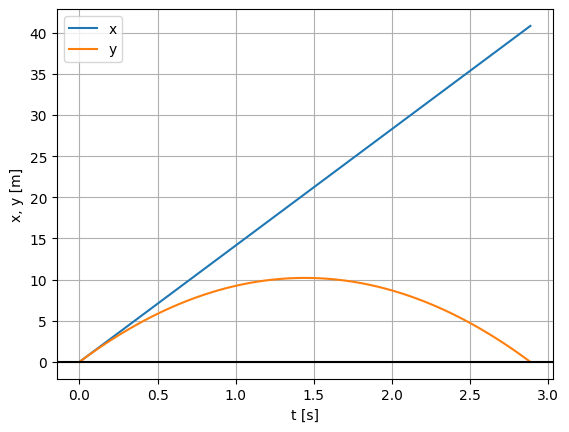

In [ ]:
plt.grid()
plt.plot(ts, xs, label='x')
plt.plot(ts, ys, label='y')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('x, y [m]')
plt.axhline(0, color='k') # horizantal line

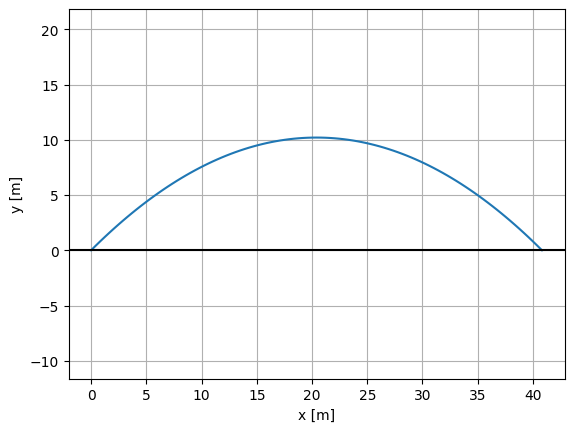

In [ ]:
plt.axis('equal') # 가로-세로 비 유지
plt.grid()
plt.plot(xs, ys)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axhline(0, color='k')

In [ ]:
vxf = sym.lambdify([t], vx.subs(rules))
vyf = sym.lambdify([t], vy.subs(rules))

In [ ]:
# vxf는 상수 함수이므로 배열을 대입했을 때 배열을 return하지 않고 상수 값 하나만 나온다.
vxf(ts)

14.142135623731

In [ ]:
vyf(ts)

array([ 1.41421356e+01,  1.38592929e+01,  1.35764502e+01,  1.32936075e+01,
        1.30107648e+01,  1.27279221e+01,  1.24450793e+01,  1.21622366e+01,
        1.18793939e+01,  1.15965512e+01,  1.13137085e+01,  1.10308658e+01,
        1.07480231e+01,  1.04651804e+01,  1.01823376e+01,  9.89949494e+00,
        9.61665222e+00,  9.33380951e+00,  9.05096680e+00,  8.76812409e+00,
        8.48528137e+00,  8.20243866e+00,  7.91959595e+00,  7.63675324e+00,
        7.35391052e+00,  7.07106781e+00,  6.78822510e+00,  6.50538239e+00,
        6.22253967e+00,  5.93969696e+00,  5.65685425e+00,  5.37401154e+00,
        5.09116882e+00,  4.80832611e+00,  4.52548340e+00,  4.24264069e+00,
        3.95979797e+00,  3.67695526e+00,  3.39411255e+00,  3.11126984e+00,
        2.82842712e+00,  2.54558441e+00,  2.26274170e+00,  1.97989899e+00,
        1.69705627e+00,  1.41421356e+00,  1.13137085e+00,  8.48528137e-01,
        5.65685425e-01,  2.82842712e-01, -5.15143483e-14, -2.82842712e-01,
       -5.65685425e-01, -

In [ ]:
# vxf에 numpy array를 대입했을 때 배열 모양(shape)이 유지되도록 vectorize 해준다.
vxf = np.vectorize(vxf)

In [ ]:
vxf(ts)

array([14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14213562,
       14.14213562, 14.14213562, 14.14213562, 14.14213562, 14.14

In [ ]:
vxs = vxf(ts)
vys = vyf(ts)

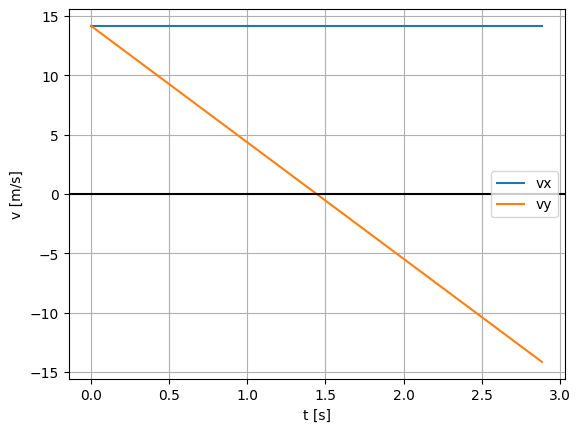

In [ ]:
plt.grid()
plt.plot(ts, vxs, label='vx')
plt.plot(ts, vys, label='vy')
plt.legend(loc='center right')
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.axhline(0, color='k')

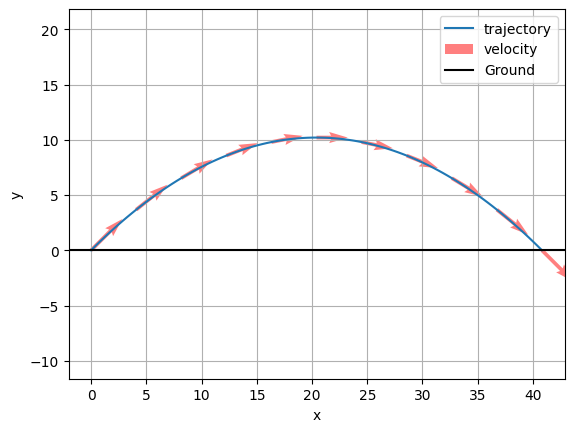

In [ ]:
# 비행 궤적의 모습을 왜곡 없이 보기 위해서 종횡비(aspect ratio)를 같게 해준다.
plt.axis('equal')

# 비행 궤적 플로팅:
plt.plot(xs, ys, label="trajectory")

# 속도를 나타내는 화살표는 10개마다 하나씩만 붙여준다.
sr = 10 # skip rate
plt.quiver(xs[::sr], ys[::sr], vxs[::sr], vys[::sr], \
           angles='xy', scale_units='xy', scale=5, color='red', alpha=0.5, label="velocity")

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='k', label="Ground")
plt.legend()

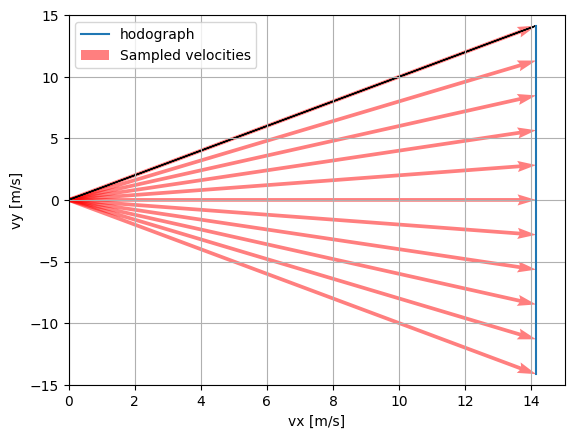

In [ ]:
#plt.axis('equal')
sr = 10
O = np.zeros_like(ts) # Origin
plt.xlim(0, 15)
plt.ylim(-15,15)
plt.plot(vxs, vys, label="hodograph")

plt.quiver(O[::sr], O[::sr], vxs[::sr], vys[::sr], \
           angles='xy', scale_units='xy', scale=1, color='red', alpha=0.5, label="Sampled velocities")
plt.arrow(0,0,vxs[0], vys[0])

plt.grid()
plt.xlabel('vx [m/s]')
plt.ylabel('vy [m/s]')
plt.legend()

In [ ]:
xpf = sym.lambdify([t, v0, th0, g], x)
ypf = sym.lambdify([t, v0, th0, g], y)

In [ ]:
x

t⋅v₀⋅cos(\theta₀)

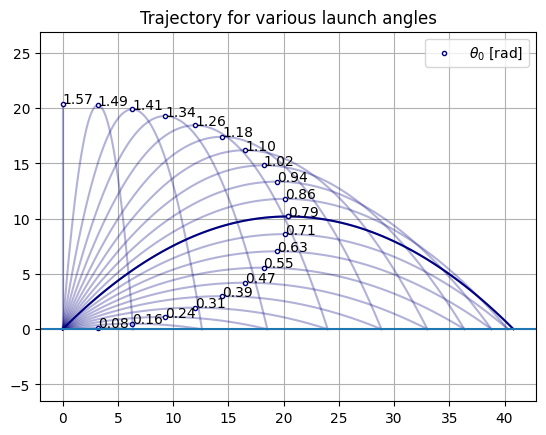

In [ ]:
plt.title("Trajectory for various launch angles")
plt.axis('equal')
plt.grid()
for th in np.linspace(np.pi/40, np.pi/2, 20):
  TR = float(tRs[1].subs({v0:V0, th0:th, g:G}))
  Ts = np.linspace(0, TR, 101)
  Xs = xpf(Ts, V0, th, G)
  Ys = ypf(Ts, V0, th, G)
  plt.plot(Xs, Ys, c='navy', alpha=0.3)
  plt.scatter(Xs[50], Ys[50], marker='.', \
              facecolors="white", edgecolor="navy", zorder=2)
  plt.text(Xs[50], Ys[50], f'{th:.2f}')

plt.plot(xs, ys, c='navy')
plt.scatter(xs[50], ys[50], marker='.', \
              facecolors="white", edgecolor="navy", \
            zorder=2, label=r"$\theta_0$ [rad]")

plt.axhline(0)
plt.legend()

* sympy.solvers.ode.dsolve 를 이용하는 방법

$$ \frac{d^2 f}{dx^2} + 9 f(x) = 0$$

In [ ]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x, y
f = Function('f')
dsolve(Derivative(f(x), x, x) + 9*f(x), f(x))

f(x) = C₁⋅sin(3⋅x) + C₂⋅cos(3⋅x)

* 비선형 미분 방정식은 해석적으로 풀 수 없는 경우가 많다. (예: 단진자)

$$\frac{d^2 f}{dx^2} + \sin(f(x)) = 0$$

In [ ]:
Derivative(f(x), x, x) + sin(f(x))

             2       
            d        
sin(f(x)) + ───(f(x))
              2      
            dx       

In [ ]:
# 해석적으로 풀리지 않는다:
dsolve( Derivative(f(x), x, x) + sin(f(x)), f(x) )

KeyboardInterrupt: 